In [16]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# Plot images

In [17]:
def plot_1img (img_1, img_1_title, figsize=(10,10), image_1_cmap=None):
    fig, (ax1) = plt.subplots(1,1,figsize=figsize)
    ax1.imshow(img_1, cmap=image_1_cmap)
    ax1.set_title(img_1_title)
    
def plot_2img (img_1, img_1_title, img_2, img_2_title, image_1_cmap=None, image_2_cmap=None, figsize = (20,10)):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize)
    ax1.imshow(img_1, cmap=image_1_cmap)
    ax1.set_title(img_1_title)
    ax2.imshow(img_2, cmap=image_2_cmap)
    ax2.set_title(img_2_title)
    
# Credits to the answer by ImportanceOfBeingErnest on https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib   
def plot_4img (img_1, img_1_title, img_2, img_2_title, img_3, img_3_title, img_4, img_4_title, image_1_cmap=None, image_2_cmap=None, image_3_cmap=None, image_4_cmap=None,figsize = (20,10)):
    f, axarr = plt.subplots(2,2, figsize=figsize)
    axarr[0,0].imshow(img_1, cmap=image_1_cmap)
    axarr[0,0].set_title(img_1_title)
    axarr[0,1].imshow(img_2, cmap=image_2_cmap)
    axarr[0,1].set_title(img_2_title)
    axarr[1,0].imshow(img_3, cmap=image_3_cmap)
    axarr[1,0].set_title(img_3_title)
    axarr[1,1].imshow(img_4, cmap=image_4_cmap)
    axarr[1,1].set_title(img_4_title)
    
def plot_8img (img_1, img_1_title, img_2, img_2_title, img_3, img_3_title, img_4, img_4_title, img_5, img_5_title, img_6, img_6_title, img_7, img_7_title, img_8, img_8_title, 
               image_1_cmap=None, image_2_cmap=None, image_3_cmap=None, image_4_cmap=None, image_5_cmap=None, image_6_cmap=None, image_7_cmap=None, image_8_cmap=None, figsize = (20,7)):
    f, axarr = plt.subplots(2,4, figsize=figsize)
    axarr[0,0].imshow(img_1, cmap=image_1_cmap)
    axarr[0,0].set_title(img_1_title)
    axarr[0,1].imshow(img_2, cmap=image_2_cmap)
    axarr[0,1].set_title(img_2_title)
    axarr[0,2].imshow(img_3, cmap=image_3_cmap)
    axarr[0,2].set_title(img_3_title)
    axarr[0,3].imshow(img_4, cmap=image_4_cmap)
    axarr[0,3].set_title(img_4_title)
    axarr[1,0].imshow(img_5, cmap=image_5_cmap)
    axarr[1,0].set_title(img_5_title)
    axarr[1,1].imshow(img_6, cmap=image_6_cmap)
    axarr[1,1].set_title(img_6_title)
    axarr[1,2].imshow(img_7, cmap=image_7_cmap)
    axarr[1,2].set_title(img_7_title)
    axarr[1,3].imshow(img_8, cmap=image_8_cmap)
    axarr[1,3].set_title(img_8_title)

# Camera calibration

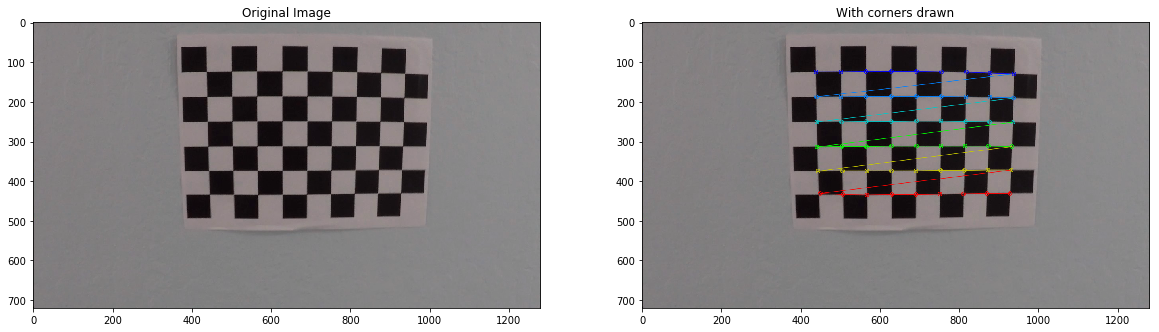

In [21]:
objpoints = []
imgpoints = []

images = glob.glob('./camera_cal/*.jpg')

#number of corners on the chessboard
nx = 9
ny = 6

#define meshgrid 
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

#loop through chessboard images
for image in images:
    # read image and make grayscale copy
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    #find chessboard corners in gray img
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cornerimg=img.copy()
        cv2.drawChessboardCorners(cornerimg, (nx, ny), corners, ret)       

#plot last processed image and the version with corners drawn.
plot_2img(img, 'Original Image', cornerimg, 'With corners drawn')

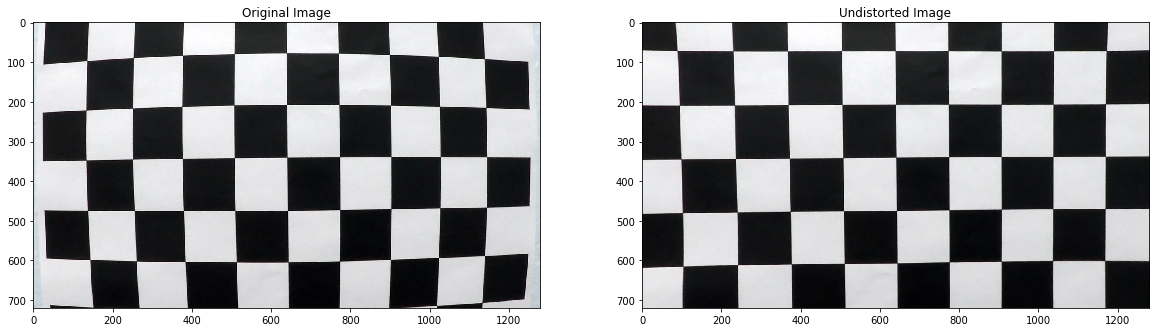

In [10]:
cal_img = cv2.imread('./camera_cal/calibration1.jpg')

def undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


#call undistort image procedure
undistorted = undistort(cal_img, objpoints, imgpoints)

plot_2img(cal_img, 'Original Image', undistorted, 'Undistorted Image')

# Color Space, Filters & Sobel operator

In [22]:
#Pick first image and transform to rgb color space
test1 = cv2.imread('test_images/test1.jpg')
color_test1 = cv2.cvtColor (test1, cv2.COLOR_BGR2RGB)

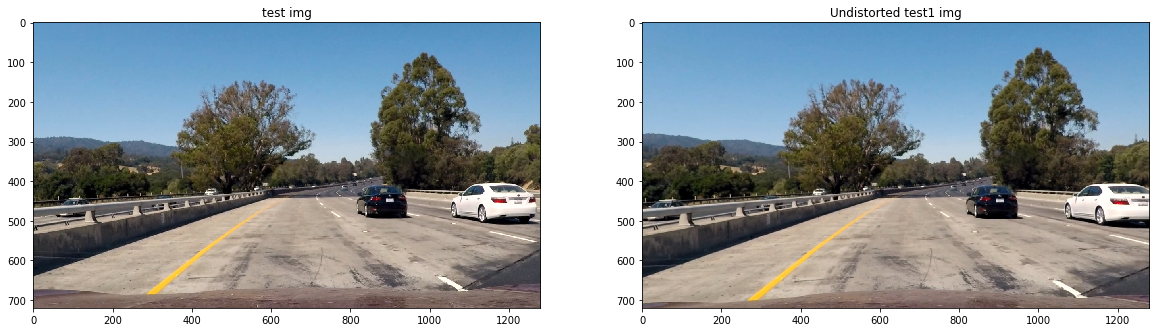

In [23]:
#Undistort image and show next to original
undistorted = undistort(color_test1, objpoints, imgpoints)
plot_2img(color_test1, "test img", undistorted, "Undistorted test1 img")

### Conversion to HLS color space and plotting all channels

In [24]:
#The course so far has tought that translation to HLS color space might prove wise to see if certain channels better distinguish the lane markings from the rest of the image.
def convert2HLS (image):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    return h_channel, l_channel, s_channel

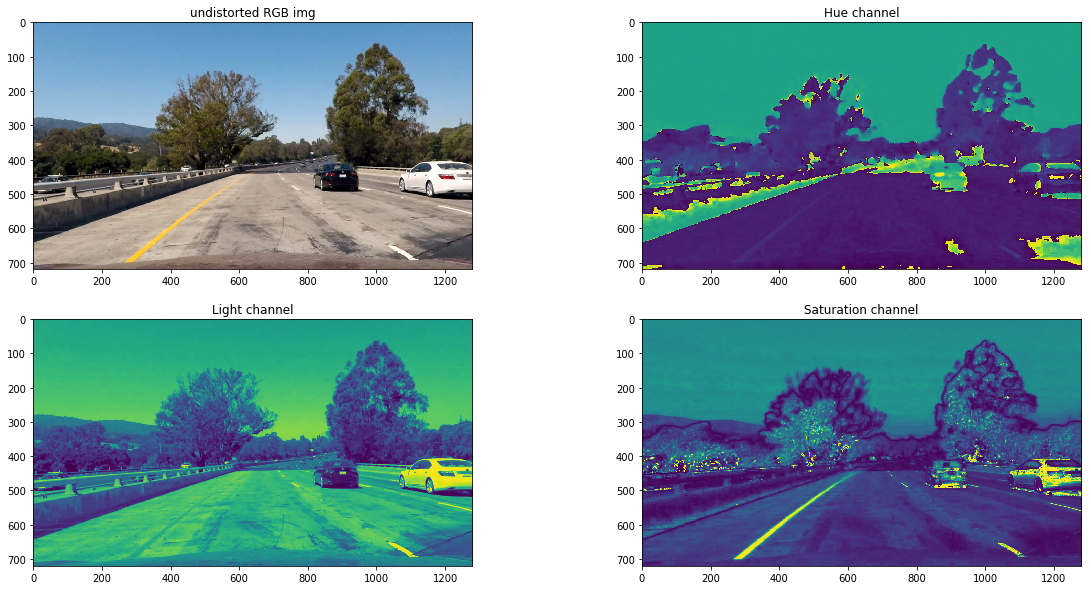

In [25]:
#extract channels from conversion function and plot channels
h_channel, l_channel, s_channel = convert2HLS (undistorted)
plot_4img(undistorted, "undistorted RGB img", h_channel, "Hue channel", l_channel, "Light channel", s_channel, "Saturation channel")

Clearly, the saturation channel provides the best way to distinguish the lane markings on the image above. Saturation should generally be independent of the lighting, therefore this channel is suitable for lane detection in a variety of lighting conditions. Let's threshold values in this channel to mask all but the lane markings in this image.

In [27]:
#function to pick and return the saturation channel for an RGB image (converted to HLS using call to HLS conversion function)
def pick_saturation(img):
    convert2HLS(img)
    return s_channel

In [29]:
#Apply threshold to saturation channel
def thresh_sat(img, sat_thresh):
    s_channel = pick_saturation(img)
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= sat_thresh[0]) & (s_channel <= sat_thresh[1])] = 1
    return s_binary

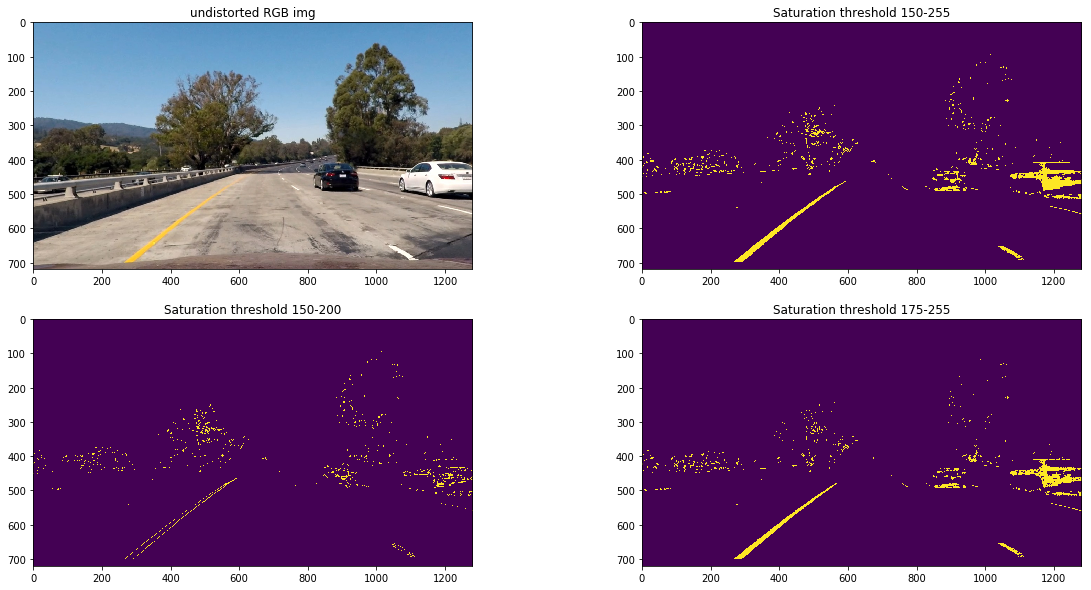

In [30]:
#Plot images using a variety of thresholds
plot_4img(undistorted, "undistorted RGB img", thresh_sat(undistorted, sat_thresh=(150,255)), "Saturation threshold 150-255", 
          thresh_sat(undistorted, sat_thresh=(150,200)), "Saturation threshold 150-200", 
          thresh_sat(undistorted, sat_thresh=(175,255)), "Saturation threshold 175-255")

Upping the lower threshold does not result in a large loss of lane pixels, but does reduce the noise within the image. 
The upper limit must clearly be high to include lane pixels. We pick the 150-255 thresholds

## Apply sobel operator to black & white image

In [32]:
#function to return black&white image from rgb input img
def gray (img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

In [33]:
#Function to apply the sobel operator in x or y orientation with adjustable thresholds (default 0, 255)
def apply_sobel(img, sobel_kernel=5, orient='x', mag_thresh=(0,255)):
    if orient == 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1,0)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0,1)
    abs_sobel = np.absolute(sobel)
    scaled_sobel= np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=mag_thresh[0]) & (scaled_sobel<=mag_thresh[1])]=1
    return binary_output

### Plot images with x-sobel applied

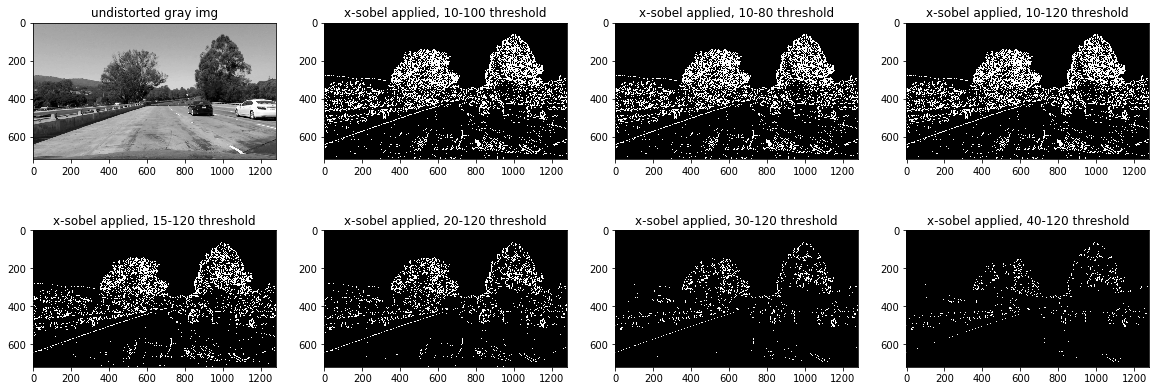

In [34]:
plot_8img(gray(undistorted), "undistorted gray img", apply_sobel(gray(undistorted), mag_thresh = (10, 100)), "x-sobel applied, 10-100 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (10, 80)), "x-sobel applied, 10-80 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (10, 120)), "x-sobel applied, 10-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (15, 120)), "x-sobel applied, 15-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (20, 120)), "x-sobel applied, 20-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (30, 120)), "x-sobel applied, 30-120 threshold", 
          apply_sobel(gray(undistorted), mag_thresh = (40, 120)), "x-sobel applied, 40-120 threshold", 
          image_1_cmap = 'gray', image_2_cmap='gray', image_3_cmap='gray' ,image_4_cmap='gray', image_5_cmap='gray', 
          image_6_cmap='gray', image_7_cmap='gray', image_8_cmap='gray')

### Plot images with y-sobel applied

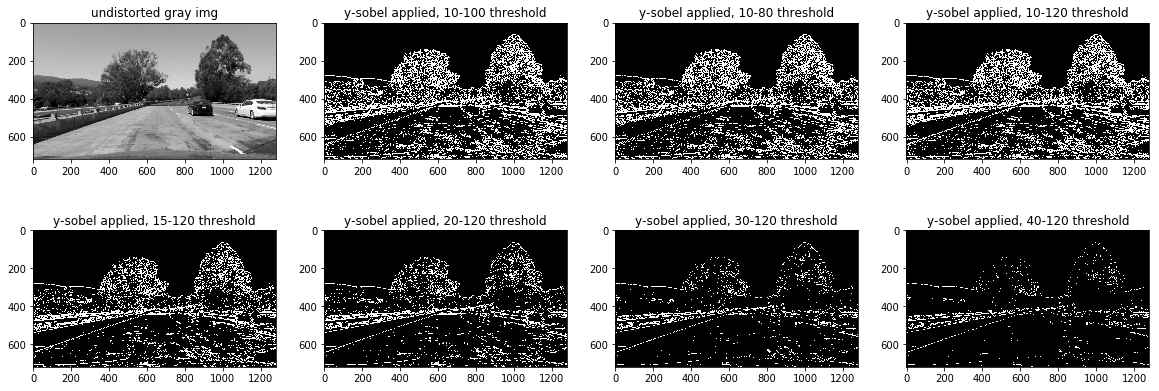

In [35]:
plot_8img(gray(undistorted), "undistorted gray img", apply_sobel(gray(undistorted), orient='y', mag_thresh = (10, 100)), "y-sobel applied, 10-100 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (10, 80)), "y-sobel applied, 10-80 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (10, 120)), "y-sobel applied, 10-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (15, 120)), "y-sobel applied, 15-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (20, 120)), "y-sobel applied, 20-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (30, 120)), "y-sobel applied, 30-120 threshold", 
          apply_sobel(gray(undistorted), orient='y', mag_thresh = (40, 120)), "y-sobel applied, 40-120 threshold", 
          image_1_cmap = 'gray', image_2_cmap='gray', image_3_cmap='gray' ,image_4_cmap='gray', image_5_cmap='gray', 
          image_6_cmap='gray', image_7_cmap='gray', image_8_cmap='gray')

The sobel in the horizontal direction show the lane markings more clearly as opposed to the y-directional sobel operator applied to the image. The lower threshold is very sensitive, when set to 10, too much noise is included in the image. Too high and we lose valuable lane marking pixels. 40 seems to be a sensible lower threshold. The upper threshold is set to 120.

## Combine saturation channel threshold and Sobel operator mask

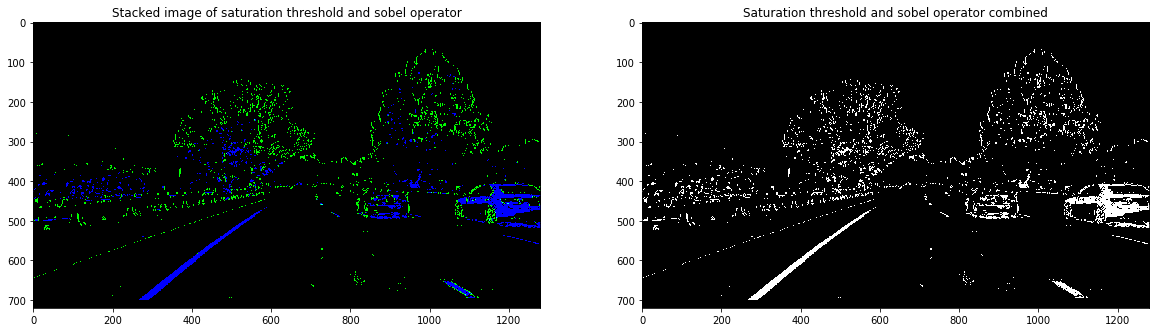

In [36]:
# Make function for combined binary
def combine_binary(undistorted):
    #Stack channels to view contributions by each of the filter/masks. Using RGB channels, we fill the green pixels with the sobel mask and the blue pixels with the saturation threshold
    s_binary = thresh_sat(undistorted, sat_thresh=(155,255))
    sobel_binary = apply_sobel(gray(undistorted), mag_thresh=(40,120))
    color_binary = np.dstack(( np.zeros_like(sobel_binary), sobel_binary, s_binary)) * 255
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sobel_binary)
    combined_binary[(s_binary == 1) | (sobel_binary == 1)] = 1
    return color_binary, combined_binary
    
# Plot both images
plot_2img(combine_binary(undistorted)[0], "Stacked image of saturation threshold and sobel operator", combine_binary(undistorted)[1], "Saturation threshold and sobel operator combined", image_2_cmap='gray')

Now, with combined_binary, we have a image which shows the lane markings cleary. Let's apply a mask to the outer region so that we can analyse the lane markings more easily.

# Apply mask to show only the region of interest

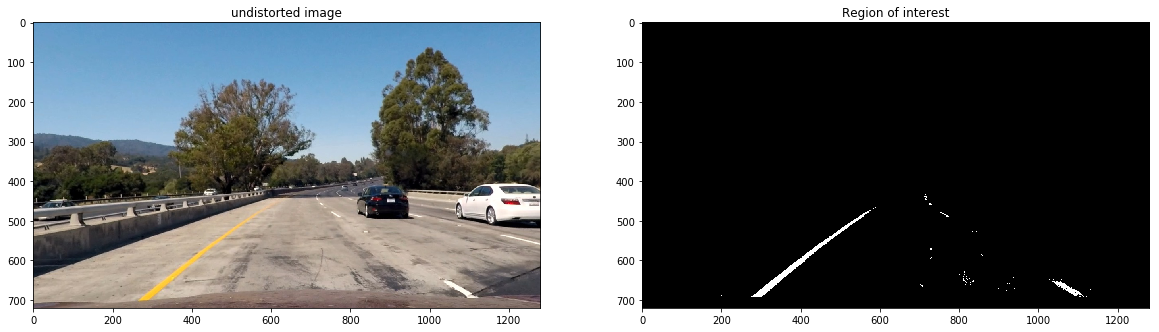

In [37]:
combined_binary = combine_binary(undistorted)[1]

# define vertices to mask just the region of interest
vertices = np.array([[180, combined_binary.shape[0]*0.96], 
                     [625, combined_binary.shape[0]*0.6], 
                     [710, combined_binary.shape[0]*0.6], 
                     [1170, combined_binary.shape[0]*0.96]])

def region_of_interest(image, vertices):
    mask = np.zeros_like(image)   
    ignore_mask_color = ([255,255,255])
    cv2.fillPoly(mask, np.int32([vertices]), 
             ignore_mask_color)
    masked_img = cv2.bitwise_and(image, mask)
    return masked_img

plot_2img(undistorted, "undistorted image", region_of_interest(combined_binary, vertices), "Region of interest", image_2_cmap='gray')

# Transform

let's transform the image into a top down view. First we define source and destination points, eyeballing the source points using the masked image.

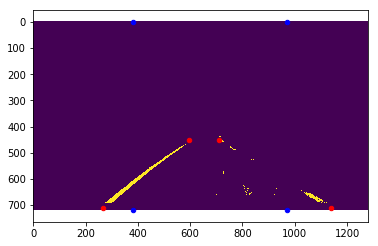

In [38]:
masked_img = region_of_interest(combined_binary, vertices)
plt.imshow(masked_img)
plt.scatter(x=[265, 595, 710, 1140], y=[710, 450, 450, 710], c='r', s=20)
plt.scatter(x=[380, 380, 970, 970], y=[0, masked_img.shape[0], masked_img.shape[0], 0], c='b', s=20)

src = np.float32([[595, 450], [265, 710], [1140, 710], [730, 450]])
dst = np.float32([[380, 0], [380, masked_img.shape[0]], [970, masked_img.shape[0]], [970, 0]])

In [39]:
def warpimage (img, src, dst):
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)
        warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
        return warped, M, Minv

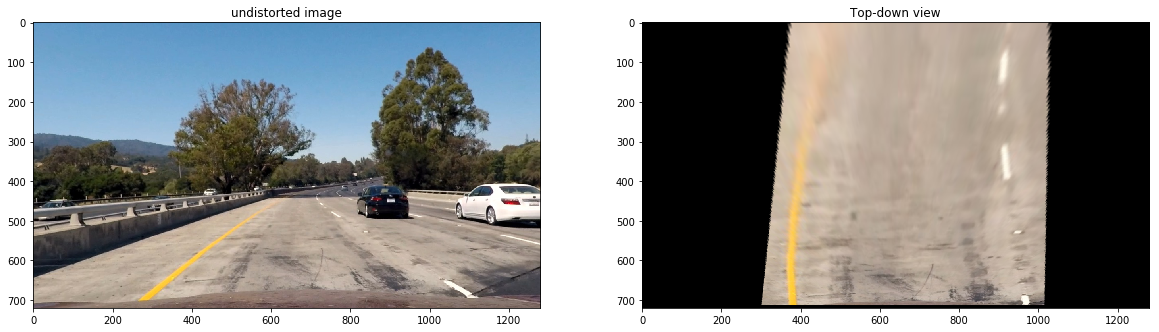

In [40]:
transformed_img = warpimage(region_of_interest(undistorted, vertices), src, dst)
plot_2img(undistorted, "undistorted image", transformed_img[0], "Top-down view")

Apply the transformation to the masked image and show these

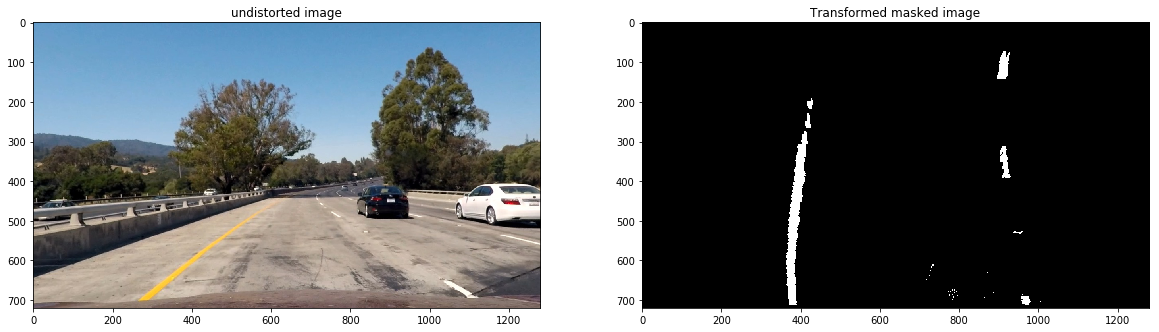

In [41]:
transformed_img = warpimage(masked_img, src, dst)
plot_2img(undistorted, "undistorted image", transformed_img[0], "Transformed masked image", image_2_cmap='gray')

## Histogram
Using the histogram, we try to find the starting points on the X-axis of the lane lines

In [42]:
def hist(img):
    bottom_half = img[img.shape[0]//2:,:]
    #sum pixel values vertically
    histogram = np.sum(bottom_half, axis=0)
    return histogram

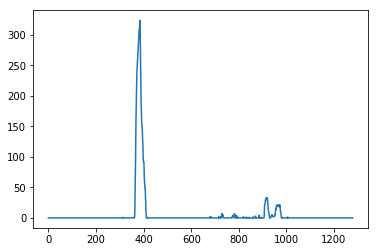

In [43]:
#plot histogram
plt.plot(hist(transformed_img[0]))

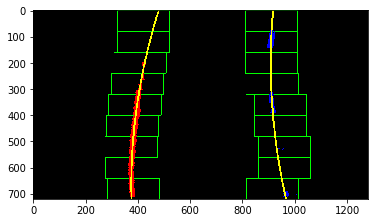

In [44]:
def find_lane_pixels(img, nwindows=9, margin=100, minpix=50):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((img, img, img))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(img.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy>=win_y_low) & (nonzeroy<win_y_high) & (nonzerox >=win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy>=win_y_low) & (nonzeroy<win_y_high) & (nonzerox >=win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds)>minpix:
            leftx_current=np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds)>minpix:
                    rightx_current=np.int(np.mean(nonzerox[good_right_inds]))
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    ym_per_pixel = 30/720 
    xm_per_pixel = 3.7/700 
    
    left_fit_m = np.polyfit(lefty*ym_per_pixel, leftx*xm_per_pixel, 2)
    right_fit_m = np.polyfit(righty*ym_per_pixel, rightx*xm_per_pixel, 2)
    
    radius, offset = get_radius_and_offset(left_fit_m, right_fit_m, ym_per_pixel, xm_per_pixel)

    # Highlight lane pixels and draw fit polynomials
    lane_pixel_img = np.dstack((img, img, img))*255
    lane_pixel_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    lane_pixel_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    return leftx, lefty, rightx, righty, radius, offset, out_img

def draw_polynomial(img, fit):
    y = np.linspace(0, img.shape[0]-1, img.shape[0])
    x = fit[0]*y**2 + fit[1]*y + fit[2]
    pts = np.array([np.transpose(np.vstack([x, y]))])
    cv2.polylines(img, np.int_(pts), isClosed=False, color=(255, 255,0), thickness=5)

def fit_polynomial(img):
    """Extend the lane lines
    
    Given an image (np.array), fit a second order polynomial to the detected lines.
    
    Parameters:
        img (numpy.array): numpy array representation of an image
    Returns:
        ploty: np.array of evenly spaced numbers over a specified interval
        left_fit (list): polynomial coefficients of the left lane, highest power first
        right_fit (list): polynomial coefficients of the right lane, highest power first
        radius: mean radius in meters of the left and right lane curvature 
        offset: distance in meters from the center of the lane
    """
    
    # Find our lane pixels first
    leftx, lefty, rightx, righty, radius, offset, out_img = find_lane_pixels(img)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    draw_polynomial(out_img, left_fit)
    draw_polynomial(out_img, right_fit)
    
    return ploty, left_fit, right_fit, radius, offset, out_img

def get_radius_and_offset(left_fit, right_fit, ym_per_pixel, xm_per_pixel):
    """Get the radius of a lane and the offset of the camera
    
    Given the the polynomial fit of two lines and the meters per pixel of an image, 
    calculate the mean radius of the curvature of the lane and the camera's distance 
    from the center of the lane.
    
    Parameters:
        left_fit (list): polynomial coefficients of the left lane, highest power first
        right_fit (list): polynomial coefficients of the right lane, highest power first
        ym_per_pixel (float):
        xm_per_pixel (float): 
        
    Returns:
        radius (float): median radius in meters of the left and right lane curvature 
        offset (float) : distance in meters from the center of the lane
    """
    left_curverad =  ((1 + (2*left_fit[0]*720*ym_per_pixel + left_fit[1])**2)**(3/2))/np.abs(2*left_fit[0])
    right_curverad =  ((1 + (2*right_fit[0]*720*ym_per_pixel + right_fit[1])**2)**(3/2))/np.abs(2*right_fit[0])
    
    left_lane = left_fit[0]*(720*ym_per_pixel)**2 + left_fit[1]*720*ym_per_pixel + left_fit[2]
    right_lane = right_fit[0]*(720*ym_per_pixel)**2 + right_fit[1]*720*ym_per_pixel + right_fit[2]
    
    radius = np.mean([left_curverad, right_curverad])
    offset = [670*xm_per_pixel - np.mean([left_lane, right_lane]), right_lane-left_lane]
    return radius, offset


out_img = fit_polynomial(transformed_img[0])
plt.imshow(out_img[5])

In [45]:
def draw(original_img, img, left_fit, right_fit, Minv):
    """Fill the detected lane
    
    Given an image (np.array), draw a filled polygon of the lane
    
    Parameters:
        original_img (numpy.array): numpy array representation of the original image 
        img (numpy.array): numpy array representation of an image
        left_fit (list): polynomial coefficients of the left lane, highest power first
        right_fit (list): polynomial coefficients of the right lane, highest power first
        Minv (numpy.array): the inverse perspective transform
        
    Returns:
        result: numpy array representation of the lane detected image
    """
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0])
    leftx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    rightx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([leftx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([rightx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(original_img, 1, newwarp, 0.3, 0)
    return result

def add_calculations(result_img, radius, offset):   
    """Add the radius and offset to an image
    
    Parameters:
        result_img (numpy.array): numpy array representation of an image 
        radius (float): median radius in meters of the left and right lane curvature 
        offset (float) : distance in meters from the center of the lane

    Returns:
        result_img (numpy.array): numpy array representation of an image with added text
    """
    # Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
    cv2.putText(result_img, 'Radius of Curvature: {} m'.format(round(radius)), (50, 100), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 4)
    cv2.putText(result_img, 'Offset: {} m'.format(round(offset[0], 3)), (50, 200), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 4)
    
    return result_img

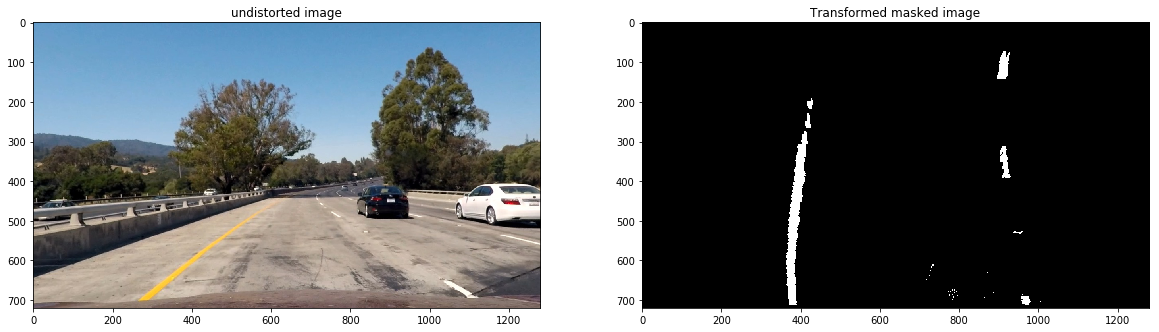

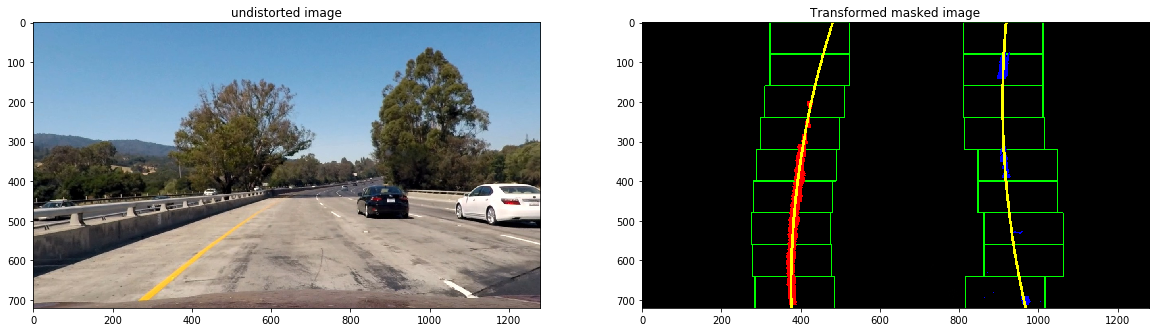

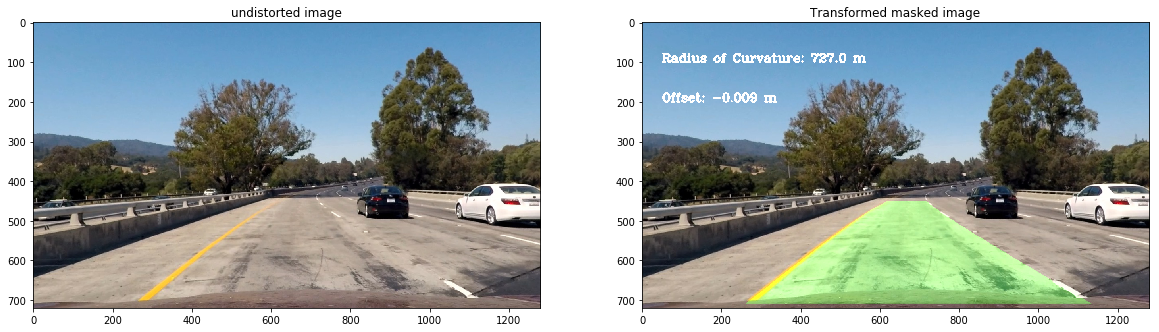

In [46]:
# Detect lane pixels and fit to find the lane boundary.
ploty, left_fit, right_fit, radius, offset, polyfit_img = fit_polynomial(transformed_img[0])

# Warp the detected lane boundaries back onto the original image.
projected_lanes_img = draw(np.copy(undistorted), transformed_img[0], left_fit, right_fit, transformed_img[2])

# Calculate radius and offset
out_img = add_calculations(projected_lanes_img, radius, offset)

plot_2img(undistorted, "undistorted image", transformed_img[0], "Transformed masked image", image_2_cmap='gray')
plot_2img(undistorted, "undistorted image", polyfit_img, "Transformed masked image", image_2_cmap='gray')
plot_2img(undistorted, "undistorted image", out_img, "Transformed masked image", image_2_cmap='gray')

## Pipeline for lane detection on single image

In [47]:
# Get image
test1 = cv2.imread('CarND-Advanced-Lane-Lines/test_images/test3.jpg')

# Convert image to RGB colorspace
#color_test1 = cv2.cvtColor (test1, cv2.COLOR_BGR2RGB)

# Undistort image
undistorted = undistort(color_test1, objpoints, imgpoints)

# Transform image using source and destinations points (hardcoded)
transformed_img = warpimage(region_of_interest(undistorted, vertices), src, dst)

# Detect lane pixels and fit to find the lane boundary.
ploty, left_fit, right_fit, radius, offset, polyfit_img = fit_polynomial(transformed_img[0])

# Warp the detected lane boundaries back onto the original image.
#projected_lanes_img = draw(np.copy(undistorted), transformed_img[0], left_fit, right_fit, transformed_img[2])

# Calculate radius and offset
#out_img = add_calculations(projected_lanes_img, radius, offset)

plot_2img(undistorted, "undistorted image", transformed_img[0], "Transformed masked image", image_2_cmap='gray')
plot_2img(undistorted, "undistorted image", polyfit_img, "Transformed masked image", image_2_cmap='gray')
plot_2img(undistorted, "undistorted image", out_img, "Transformed masked image", image_2_cmap='gray')

error: /tmp/build/80754af9/opencv_1512491964794/work/modules/core/src/matrix.cpp:1168: error: (-215) cn <= 4 in function scalarToRawData


## Video pipeline

In [48]:
from IPython.display import HTML
from moviepy.editor import VideoFileClip

class PipelineVideo(object):
    def __init__(self):
        self.frame_ind = 0
        self.left_fit = None
        self.right_fit = None
        self.radius = None
        self.offset = None
        self.frames = {}
    
    def update_radius_delta(self, radius):
        if (self.frame_ind == 0) | (self.radius is None):
            return 0
        else:
            return abs((radius-self.radius)/self.radius)
        
    def update_offset_delta(self, offset):
        if (self.frame_ind == 0) | (self.offset is None):
            return 0
        else:
            offset[0]
            return abs((offset[0]-self.offset[0])/self.offset[0])

In [49]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)

def image_pipeline(img, pipeline):
    img_copy = np.copy(img)
    
    # Apply a distortion correction to raw images.
    distortion_corrected_img = cv2.undistort(img_copy, mtx, dist, None, mtx)

    # Use color transforms, gradients, etc., to create a thresholded binary image.
    binary_output = combine_binary(distortion_corrected_img)
    combined_binary_img = binary_output[1]
        
    # Narrow the image to a region of interest
    vertices = np.array([[160, combined_binary_img.shape[0]*0.96], 
                         [600, combined_binary_img.shape[0]*0.6], 
                         [750, combined_binary_img.shape[0]*0.6], 
                         [1180, combined_binary_img.shape[0]*0.96]], np.int32)
    
    masked_img = region_of_interest(combined_binary_img, [vertices])
    
    # Apply a perspective transform to rectify binary image ("birds-eye view").
    src = np.float32([[595, 450], [265, 710], [1160, 710], [730, 450]])
    dst = np.float32([[360, 0], [360, masked_img.shape[0]], [980, masked_img.shape[0]], [980, 0]])
  
    combined_binary_warped, M, Minv = warpimage(masked_img, src, dst)

    
    # Detect lane pixels and fit to find the lane boundary.
    ploty, left_fit, right_fit, radius, offset, out_img = fit_polynomial(combined_binary_warped)
    
    pipeline.frames[pipeline.frame_ind] = {
        'left_fit': left_fit,
        'right_fit': right_fit,
        'radius': radius,
        'radius_delta': pipeline.update_radius_delta(radius),
        'offset': offset,
        'offset_delta': pipeline.update_offset_delta(offset),
        'updated': True
    }

    if pipeline.frame_ind == 0:
        pipeline.offset = offset
        pipeline.radius = radius
        
    # if the changes from the last frame are too great, use the fits from the previous frame
    if ((abs((offset[0]-pipeline.offset[0])/pipeline.offset[0]) > 8) | \
       ((pipeline.radius < 1000) & (abs((radius-pipeline.radius)/pipeline.radius) > 35))) & \
       (pipeline.frame_ind > 0):
        pipeline.frames[pipeline.frame_ind]['updated'] = False
        left_fit = pipeline.left_fit
        right_fit = pipeline.right_fit
        radius = pipeline.radius
        offset = pipeline.offset

    # Warp the detected lane boundaries back onto the original image.
    projected_lanes_img = draw(img_copy, combined_binary_warped, left_fit, right_fit, Minv)

    # Calculate radius and offset
    out_img = add_calculations(projected_lanes_img, radius, offset)
    
    pipeline.frame_ind += 1
    pipeline.left_fit = left_fit
    pipeline.right_fit = right_fit
    pipeline.radius = radius
    pipeline.offset = offset

    return out_img

In [50]:
pipeline = PipelineVideo()
video_out = './output_videos/lane_detection_video.mp4'

video_clip = VideoFileClip("project_video.mp4").subclip(40,50)
clip = video_clip.fl_image(lambda x: image_pipeline(x, pipeline))
%time clip.write_videofile(video_out, audio=False)


[MoviePy] >>>> Building video ./output_videos/lane_detection_video.mp4
[MoviePy] Writing video ./output_videos/lane_detection_video.mp4


 99%|█████████▉| 150/151 [00:26<00:00,  4.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_videos/lane_detection_video.mp4 

CPU times: user 14.1 s, sys: 368 ms, total: 14.5 s
Wall time: 29.3 s


In [51]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_out))

In [52]:
pipeline = PipelineVideo()
video_out = './output_videos/harder_challenge_video.mp4'

video_clip = VideoFileClip("harder_challenge_video.mp4")
clip = video_clip.fl_image(lambda x: image_pipeline(x, pipeline))
%time clip.write_videofile(video_out, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_out))

[MoviePy] >>>> Building video ./output_videos/harder_challenge_video.mp4
[MoviePy] Writing video ./output_videos/harder_challenge_video.mp4


100%|█████████▉| 1199/1200 [04:24<00:00,  4.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_videos/harder_challenge_video.mp4 

CPU times: user 1min 52s, sys: 2.41 s, total: 1min 55s
Wall time: 4min 28s
